### Planning

#### I am a professor at a university and have some recorded information about the grades of my students.

I would ideally like to have a generalizable model that will tell me, based on academic perfomance, how likely the student is to achieve a passing grade.

Can I predict the student's final grade within a reasonable basis based on previous grade performance?

Ideal: 5 point average error from actual grade

In [1]:
# imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import env

import warnings
warnings.filterwarnings('ignore')

### Wrangle Part 1; Acquire: 

In [2]:
# grab our csv locally, same as if it were cached


In [7]:
df = pd.read_csv('student_grades.csv')

In [8]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


Procedure:
1) grab the data, make sure someone else can grab the data
    - Getting the csv locally, will ensure any one else with notebook will be delivered the file to their local device
Next Steps:
2) "checking out" (summarize) our data:
   - look at our shape, look at our datatypes, look at our distributions
3) check out anything weird, fix it
   - outliers that don't belong, corrupted data, missing data, encoding categorical information
4) train/test split

In [9]:
# shape

In [10]:
df.shape

(104, 5)

In [11]:
# describe
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [13]:
# look for null values
# so far:
# looks like exam3 has filled values, but wrong data type
# looks like exam1 is correct data type, but missing a value

In [14]:
df.isnull().sum()

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64

In [15]:
df.isnull().any()

student_id     False
exam1           True
exam2          False
exam3          False
final_grade    False
dtype: bool

In [16]:
df.columns[df.isnull().any()]

Index(['exam1'], dtype='object')

#### Takeaways:
- Missing grade in Exam1 needs to be fixed
- Data type in Exam3 needs to be fixed (not sure what's wrong there yet)
- small amount of missing information, may be best to drop rather than impute
- is exam1 in a float type for a reason?
- do we need student_id in here?

In [19]:
df.exam3.value_counts(dropna=True, ascending=True)

       1
95     8
86     8
87     8
85     8
94     8
79     8
70     8
75    15
78    16
96    16
Name: exam3, dtype: int64

In [20]:
# let's fix the weird whitespace
# how can we go about doing that?
# fill it with a NaN, then deal with it as stated
# looks like its only one value, seems droppable

In [21]:
# regex translation:
# anything that starts with and ends with
# zero or more characters of whitespace
df = df.replace(r'^\s*$', np.nan, regex=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [24]:
df.exam3.value_counts(dropna=False)

78     16
96     16
75     15
95      8
86      8
87      8
85      8
94      8
79      8
70      8
NaN     1
Name: exam3, dtype: int64

In [25]:
# take care of these nans bu dropping them
# reassign df into df with null values dropped
df = df.dropna()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    object 
 4   final_grade  102 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


In [27]:
# can we just cast everything as an integer?
df = df.astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,102.0,53.313725,29.886909,1.0,28.25,53.5,78.75,104.0
exam1,102.0,78.833333,14.167375,57.0,70.00,79.0,92.00,100.0
exam2,102.0,77.500000,10.297313,65.0,70.00,75.0,89.00,93.0
exam3,102.0,84.294118,8.736617,70.0,78.00,85.0,94.00,96.0
final_grade,102.0,81.970588,10.833991,65.0,72.00,81.0,93.00,97.0


In [30]:
### Visualization of univariate statistics:

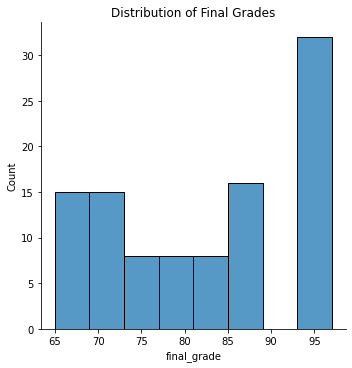

In [34]:
sns.displot(x='final_grade', data=df)
plt.title('Distribution of Final Grades')
plt.show()

In [35]:
# we've done a thing once, do it in a loop

In [38]:
cols = ['exam1', 'exam2', 'exam3', 'final_grade']

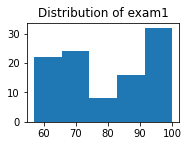

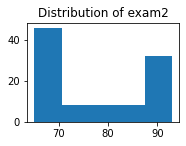

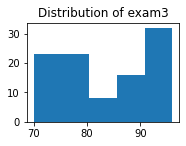

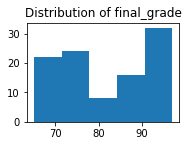

In [42]:
for i, col in enumerate(cols):
    plot_num = i+1
    plt.subplot(2,2,plot_num)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=5)
    plt.grid(False)
    plt.show()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97
...,...,...,...,...
99,70,65,78,77
100,62,70,79,70
101,58,65,70,68
102,57,65,75,65


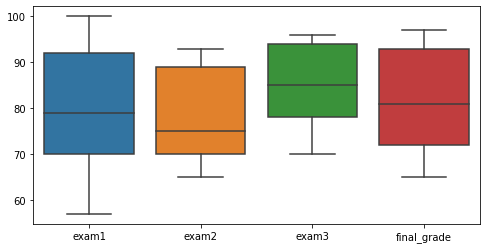

In [45]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns='student_id'))
plt.show()

In [52]:
def split_data(df):
    train_val, test = train_test_split(df, train_size=0.8,random_state=1349)
    train, validate = train_test_split(train_val, train_size=0.7, random_state=1349)
    return train, validate, test

In [56]:
def wrangle_grades():
    '''
    Wrangle grades will acquire data about student grades
    from the local directory presuming student_grades.csv lives in cwd
    will drop missing values and replace whitespace as well as cast data types to integer
    returns a train, validate and test data set
    '''
    # grab our data
    df = pd.read_csv('student_grades.csv')
    # remove whitespace  
    df = df.replace(r'^\s*$', np.nan, regex=True)
    # drop nulls
    df = df.dropna()
    # cast as integers
    df = df.astype('int')
    # split data
    return split_data(df)


In [57]:
train, val, test = wrangle_grades()

In [58]:
train.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
63,64,57,65,75,65
26,27,100,90,95,96
102,103,57,65,75,65
52,53,100,90,95,96


In [51]:
from sklearn.model_selection import train_test_split

In [53]:
train, val, test = split_data(df)

In [54]:
train.size, val.size, test.size

(280, 125, 105)

In [55]:
train.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
63,64,57,65,75,65
26,27,100,90,95,96
102,103,57,65,75,65
52,53,100,90,95,96
